Before we start discussing different types of plots, you need to learn about the elements that help us create charts and plots effectively. There are two types data, which are as follows:

Facts

Dimensions

Facts and dimensions are different types of variables that help you interpret data better. Facts are numerical data, and dimensions are metadata. Metadata explains the additional information associated with the factual variable. Both facts and dimensions are equally important for generating actionable insights from a given data set. For example, in a data set about the height of students in a class, the height of the students would be a fact variable, whereas the gender of the students would be a dimensional variable. You can use dimensions to slice data for easier analysis. In this case, the distribution of height based on the gender of a student can be studied.

Identifying facts and dimensions among variables effectively will help you start the analysis of a given data set.

# Plotting Exercise(Numpy Attributes)

As you learnt in the session, data visualisation is an essential skill for a data scientist to have. Charts and graphs are the easiest way to communicate data to different kinds of consumers. The assessments in this notebook will test your ability to represent information. The questions will be investigative and will not have detailed instructions about the execution; you will have to figure that part out yourself. Don't worry, there are no wrong answers here, only happy accidents. Try these questions on your own, to verify if you have done the task correctly, look at the solution as a person who does not know the data and is looking at it for the first time. You will be able to identify better ways to represent data automatically.

The dataset given for this notebook is the pricing data for diamonds based on the carat, cut, colour and so on. Take a look at the data below and also the data dictionary for a better understanding of the data and the attributes.

In [21]:
#Importing reqired necessity 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Read the data into a dataframe

data = pd.read_csv(r"C:\Users\sairam\Downloads\diamonds.csv")

In [23]:

# As a preparatory step, let's drop Unnamed column.


data= data.drop("Unnamed: 0", axis =1 )

data.head()




,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Dictionary:


carat: Weight of the diamond (0.2--5.01)


cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)



color: Diamond colour, from J (worst) to D (best)


larity: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


epth: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)


able: Width of top of diamond relative to widest point (43--95)


rice: Price in US dollars (326 dollars -18,823 dollars)


: x = Length in mm (0--10.74)


:y = Width in mm (0--58.9)


:z = Depth in mm (0--31.8)






In [24]:
data.price.value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

In [25]:
data.shape

(53940, 10)

# Question

Investigate the variation of prices of diamonds and note your observations.

Solution
You have been asked to investigate the prices of diamonds, not its variation with respect to any other variable. What information can be gained by studying just one variable? Think about it for a moment. Can you find the highest price of a diamond? Yes. You can also find the distribution of prices. What kind of plot can be used to show the distribution of a variable? The best-situated plot is a histogram. You can use a histogram to create 'bins' in the variable and plot the count of data points in each bin. A histogram will give you the distribution of data.

In [26]:
?plt.figure

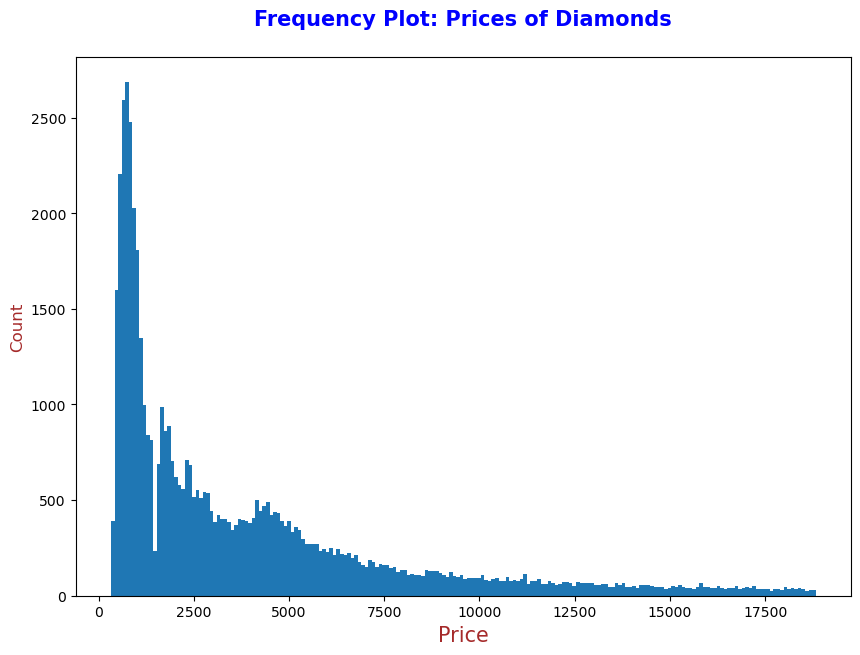

In [27]:
plt.figure(figsize =(10,7))
plt.hist(data["price"], bins = 200)

# Adding and formatting title

plt.title("Frequency Plot: Prices of Diamonds\n", fontdict={'fontsize': 15, 'fontweight' : 1000, 'color' : 'blue'})

# Labeling Axes

plt.xlabel("Price", fontdict={'fontsize': 15, 'fontweight' : 200, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()


Observations from the histogram

1  The histogram has a long tail towards the right side.

2  There are two peaks in the data, one near 500-1000 USD and the other near 4000-5000 USD.

# Question

Perform a similar variation analysis on the quality of cut.

Solution
The observations in the variable cut are categories, not values like price or carat. So you will not be able to use a histogram to do a count analysis as you did earlier. For this kind of variable, you have to use a bar plot to compare the counts of observations in each category. You can use other plot types like pie chart doughnut chart, but it isn't easy to compare the counts of each class.

In [28]:
# Before plotting extract the required data by performing necessary data manipulation.
groupdata =data.groupby('cut').count()
groupdata

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [29]:
set.columns

AttributeError: type object 'set' has no attribute 'columns'

In [30]:
x_val = []
y_val = []
for i in [0, 1, 4, 3, 2]:
    
# The elements in the list are arranged in increasing order of the quality of cut. 
# This information can be gathered from the data dictionary.  
    x_val.append(groupdata.index[i])
    y_val.append(groupdata.iloc[i,0])

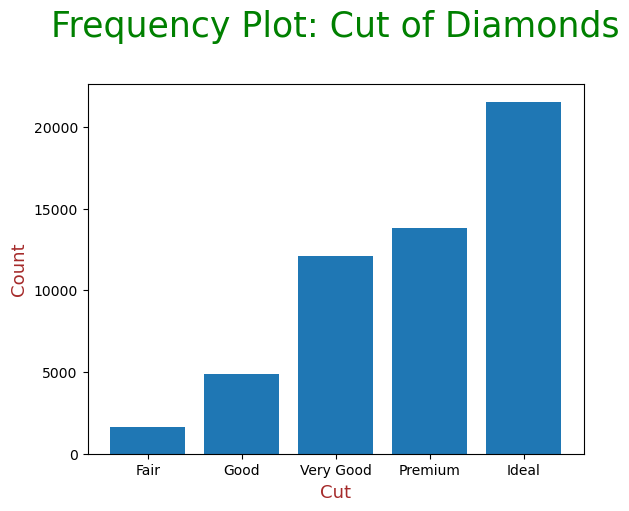

In [31]:
plt.bar(x_val, y_val)

# Adding and formatting title

plt.title("Frequency Plot: Cut of Diamonds\n", fontdict={'fontsize': 25, 'fontweight' : 200, 'color' : 'Green'})

# Labeling Axes

plt.xlabel("Cut", fontdict={'fontsize': 13, 'fontweight' : 50, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 13, 'fontweight' : 50, 'color' : 'Brown'})

plt.show()

Observations:

1 The number of diamonds goes on increasing with increasing quality of cut.

# Question

Represent the same information as above in a pie chart.

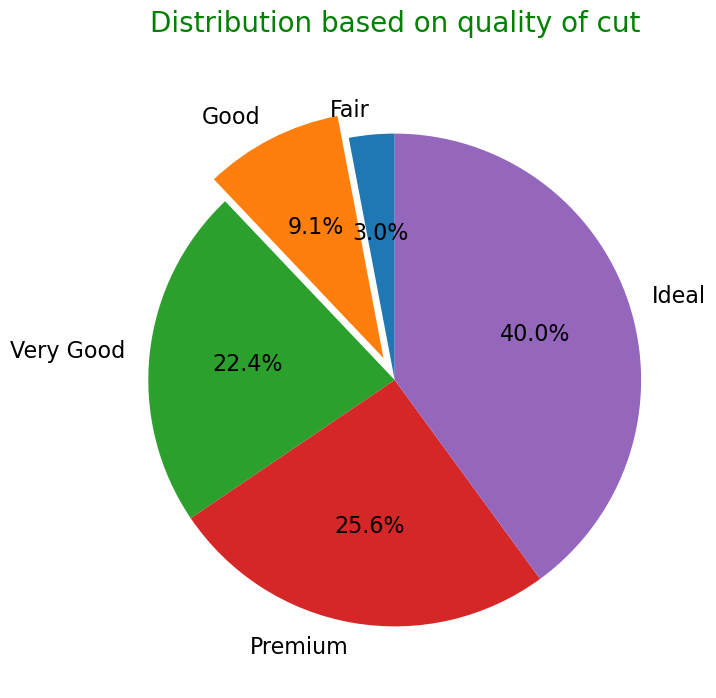

In [32]:
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [8,8])

plt.pie(y_val, explode=explode, labels=x_val, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title

plt.title("Distribution based on quality of cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

As you can see, a pie chart, although visually attractive, is not a good tool to represent information. The changes in the different sectors are not noticeable. It is absolutely necessary to have written values. Now compare the same with the bar diagram earlier, the relative differences in the distribution are very clear even without the data labels.

# Question

Investigate the variation of price of the diamonds, with respect to the carats.

In cases like these, where you investigate the relationship between two continuous variables, a scatter plot is the best device

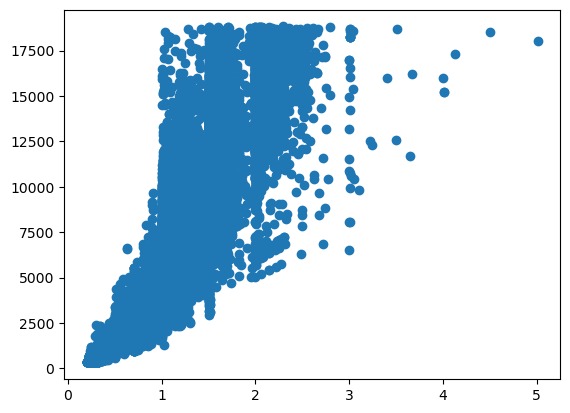

In [33]:
plt.scatter(data = data , x = 'carat', y = 'price')
plt.show()

The scatter plot with default settings looks very crowded, that is because there are a lot of data points, there are a couple of ways to solve this problem; you can either draw a smaller sample (you will learn sampling techniques in latter modules) or use smaller and more transparent markers. You can also make the plot larger.

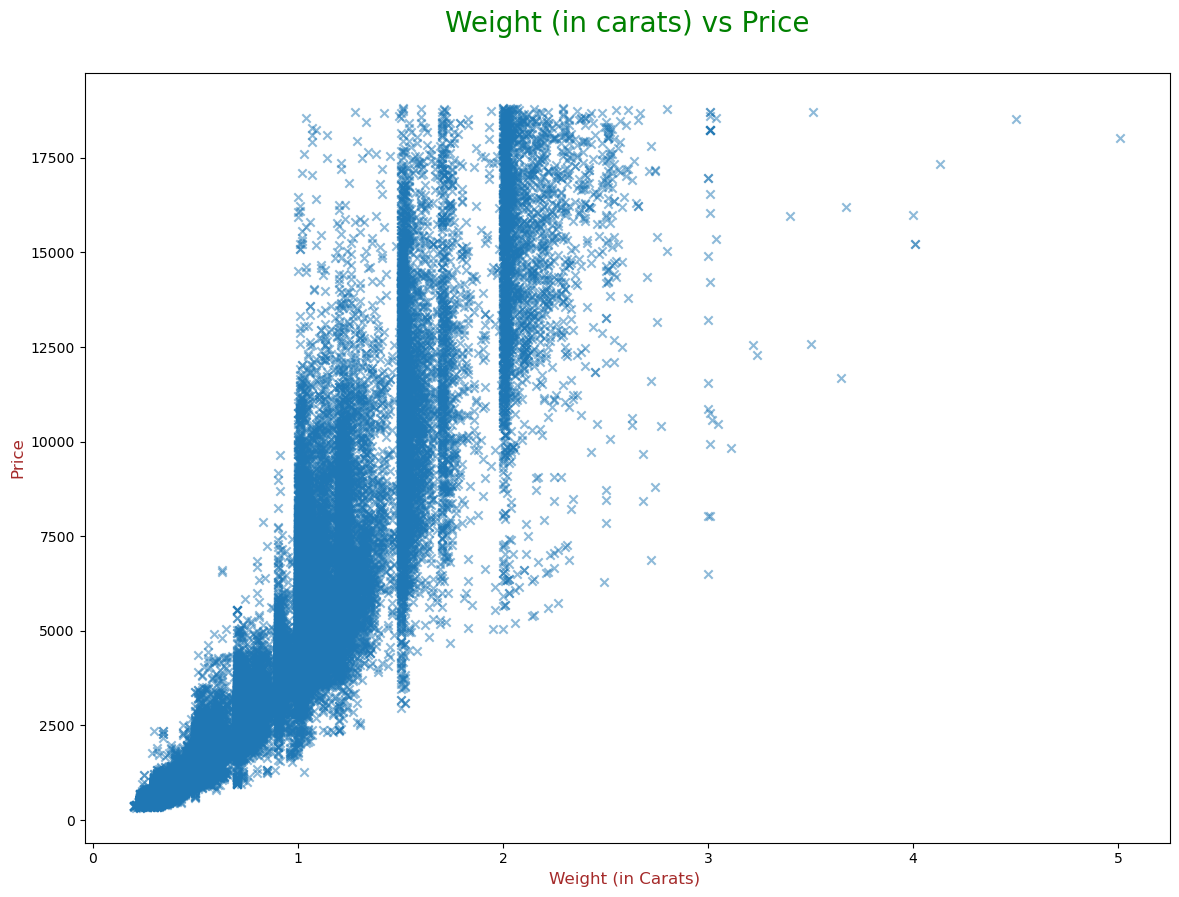

In [34]:
plt.figure(figsize = [14,10])
plt.scatter(data = data , x = 'carat', y = 'price', alpha = 0.5, marker="x")

# Adding and formatting title

plt.title("Weight (in carats) vs Price\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes

plt.xlabel("Weight (in Carats) ", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

Observations:

A general trend observed is as the weight in carats goes on increasing so does the price.
There are specific weights to which diamonds are manufactured.
There is also a lot of variation in price with the same weight.

# Question

Investigate the relationship of price with respect to the cut of the diamonds.

As you already know, "cut" is a categorical variable, and it will not be possible to use a scatter plot to analyse the variation. So you can explore the data in a lot of different ways like use colors to the display cut information in the above plot that is an excellent idea, you can try that on your own. You can also divide the data according to the cut and then plot box plots for each of the cuts. Such a plot will allow you to investigate the variation of statistical price data across various cuts.

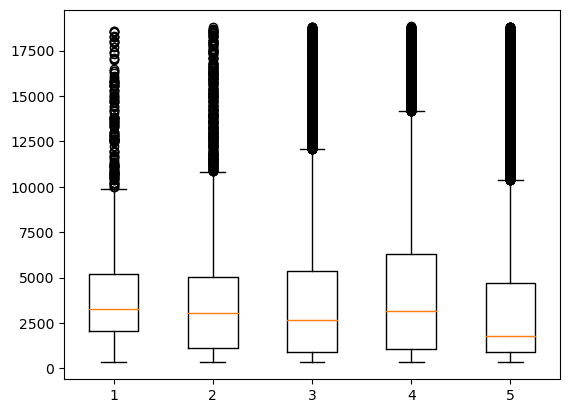

In [35]:
# Create the required dataframes
data_fair = data[data['cut'] == 'Fair']
data_good = data[data['cut'] == 'Good']
data_vgood = data[data['cut'] == 'Very Good']
data_premium = data[data['cut'] == 'Premium']
data_ideal = data[data['cut'] == 'Ideal']

plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])
plt.show()



It looks like there are a lot of outliers in the data, which are making the data hard to analyse. Let's drop all the observations above 12500 USD as all of them are outliers.

In [36]:
data_fair = data[(data['cut'] == 'Fair') & (data['price'] < 12500) ]
data_good = data[(data['cut'] == 'Good') & (data['price'] < 12500)]
data_vgood = data[(data['cut'] == 'Very Good') & (data['price'] < 12500)]
data_premium = data[(data['cut'] == 'Premium') & (data['price'] < 12500)]
data_ideal = data[(data['cut'] == 'Ideal') & (data['price'] < 12500)]


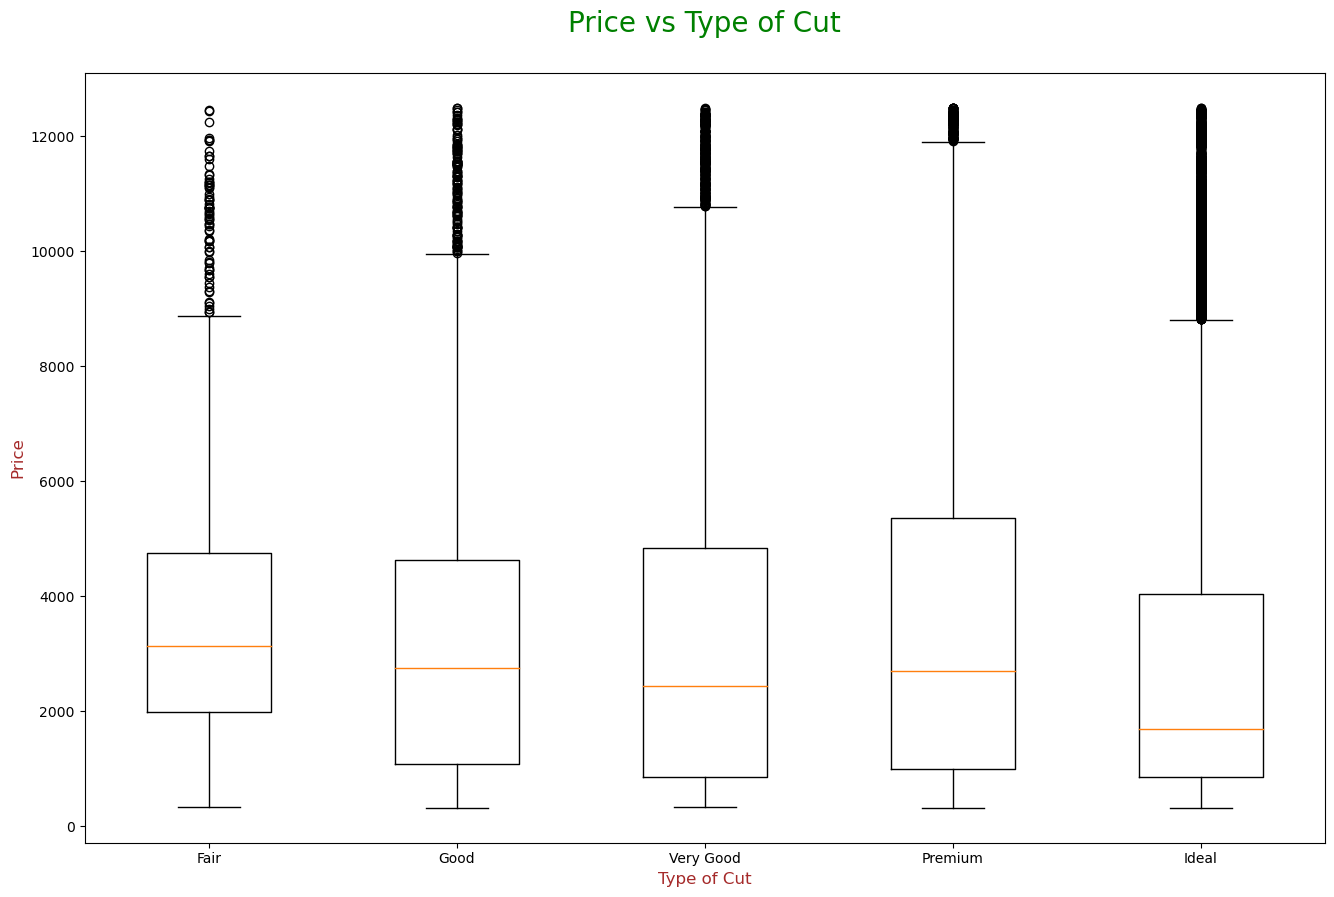

In [37]:
plt.figure(figsize = [16,10])
plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])

plt.xticks((1,2,3,4,5), ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

# Adding and formatting title
plt.title("Price vs Type of Cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Type of Cut", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()


In [38]:
?plt.bar

In [39]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

In [40]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

([<matplotlib.patches.Wedge at 0x29610fc6b10>,
 [Text(-0.10299611938704194, 1.0951674754991632, 'Fair'),
  Text(-0.5469670291979283, 1.0680950655116765, 'Good'),
  Text(-1.0935794315842282, 0.11867614257261841, 'Very Good'),
  Text(-0.18825731705720006, -1.0837708164434143, 'Premium'),
  Text(1.045666131509807, 0.34144156368742684, 'Ideal')],
 [Text(-0.05617970148384105, 0.5973640775449981, '3.0%'),
  Text(-0.3190641003654581, 0.6230554548818114, '9.1%'),
  Text(-0.5964978717732153, 0.0647324414032464, '22.4%'),
  Text(-0.10268580930392729, -0.5911477180600442, '25.6%'),
  Text(0.5703633444598947, 0.18624085292041462, '40.0%')])

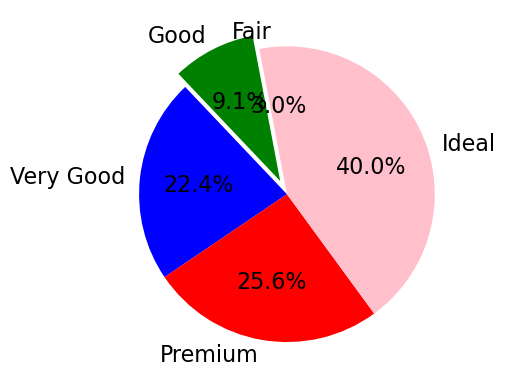

In [41]:
colors = ['pink', 'green', 'blue', 'red']
plt.pie(y_val, explode=explode, labels=x_val, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90, colors=colors)


# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.


# Problem Statement

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:

 - Does a higher size or price necessarily mean that an app would perform better than the other apps?

 - Or does a higher number of installs give a clear picture of which app would have a better rating than others?

# Session 1 - Introduction to Data Visualisation

In [2]:
# import the libraries
import pandas as pd
import numpy as np

In [3]:
#Read the dataset and check the first five rows
inp1 = pd.read_csv(r"C:\Users\sairam\Downloads\googleplaystore_v2 (1).csv")
inp1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
# check the shape of the dataframe
inp1.shape

(10841, 13)

# Data Handling and Cleaning

 The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
 - Dropping the rows containing the missing values
 - Imputing the missing values
 - Keep the missing values if they don't affect the analysis


 - Incorrect Data Types:
 - Clean certain values
 - Clean and convert an entire column

In [5]:
# check the datatypes of all the columns of the dataframe
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# Missing Value Treatment

In [6]:
#check the number of null values in the columns
inp1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating

 - Ratings is the target variable
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field
inp2 = inp1[~inp1.Rating.isnull()]

#Check the shape of the data frame
inp2.shape

(9367, 13)

In [8]:
#Check the number of nulls in the dataframe again and find the total number nulls
inp2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column
inp2[inp2['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
#Drop the rows having shifted values

inp2.loc[10472,:]

inp2[(inp2['Android Ver'].isnull() &(inp2.Category == '1.9'))]

inp2 = inp2[~(inp2['Android Ver'].isnull() & (inp2.Category =='1.9'))]

#Check the nulls again in Android version column to cross-verify
inp2[inp2['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

 - For numerical variables use mean and median
 - For categorical variables use mode

In [11]:
#Check the most common value in the Android version column
inp2['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [12]:
#Fill up the nulls in the Android Version column with the above value
inp2['Android Ver'] = inp2['Android Ver'].fillna(inp2['Android Ver'].mode()[0])

In [13]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()


3

In [14]:
#Check the nulls in the entire dataframe
inp2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [15]:
#Check the most common value in the Current version column
inp2['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [16]:
#Replace the nulls in the current version with the above value
inp2['Current Ver'] = inp2['Current Ver'].fillna(inp2['Current Ver'].mode()[0])

In [17]:
# Question : Check the most common value in the Current version column again
inp2['Current Ver'].value_counts()


Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

# Handling Incorrect Data Types

In [18]:
#Check the datatypes for all columns
inp2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
inp2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
#Analyse the Price column to check the issue
inp2.Price.value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [21]:
#Write the function to make the changes
inp2.Price = inp2.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))


In [22]:
#Verify the dtype of Price once again
inp2.Price.dtype

dtype('float64')

In [23]:
#Verify the dtype of Price once again
inp2.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [24]:
#Change the dtype of this column
inp2.Reviews = inp2.Reviews.astype("int32")
#Check the quantitative spread of this datafrarme
inp2.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [25]:
#Analyse the Installs Column

inp2.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [26]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.

def clean_installs(val):
    return int(val.replace(",","").replace("+",""))
inp2.Installs = inp2.Installs.apply(clean_installs)
inp2.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

# Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

 - Rating is between 1 and 5 for all the apps.
 - Number of Reviews is less than or equal to the number of Installs.
 - Free Apps shouldn’t have a price greater than 0.

In [27]:
#Perform the sanity checks on the Reviews column
inp2[(inp2.Reviews > inp2.Installs)].shape



(7, 13)

In [29]:
inp2[(inp2.Reviews > inp2.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [31]:
inp2 = inp2[inp2.Reviews <= inp2.Installs]

In [32]:
#perform the sanity checks on prices of free apps 
inp2[(inp2.Type == "Free") & (inp2.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or outliers from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable

Using a box plot you can identify the outliers as follows:

BoxPlots to Identify Outliers

 - Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
 - In the former case, you should determine whether or not removing them would add value to your analysis procedure.
 - You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
  - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [38]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline


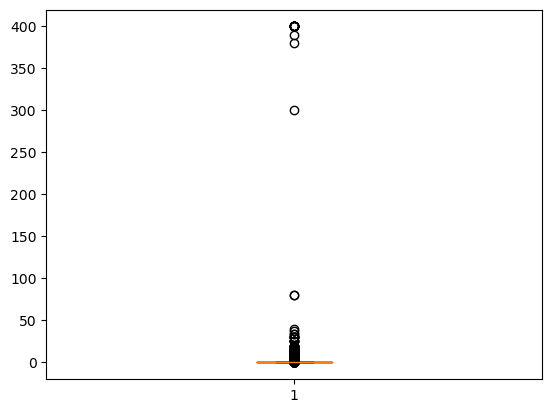

In [39]:
#Create a box plot for the price column
plt.boxplot(inp2.Price)
plt.show()

In [40]:
#Check the apps with price more than 200
inp2[inp2.Price > 200]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
#Clean the Price column
inp2 = inp2[inp2.Price < 200]


In [42]:
inp2.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<Axes: >

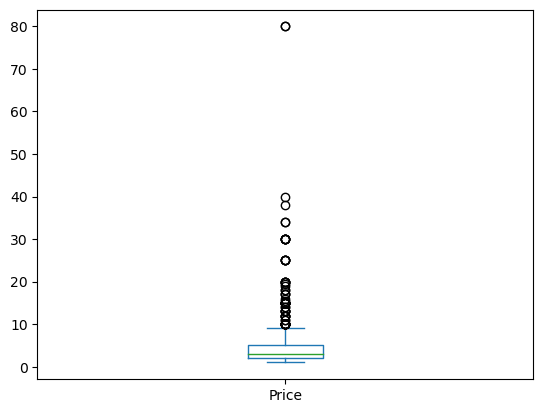

In [43]:
#Create a box plot for paid apps
inp2[inp2.Price>0].Price.plot.box()


In [44]:
#Check the apps with price more than 30
inp2[inp2.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [47]:
#Clean the Price column again
inp2 = inp2[inp2.Price <= 30]
inp2.shape

(9338, 13)

# Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific bins. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its frequency.

Histogram

You can adjust the number of bins to improve its granularity

Bins change

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

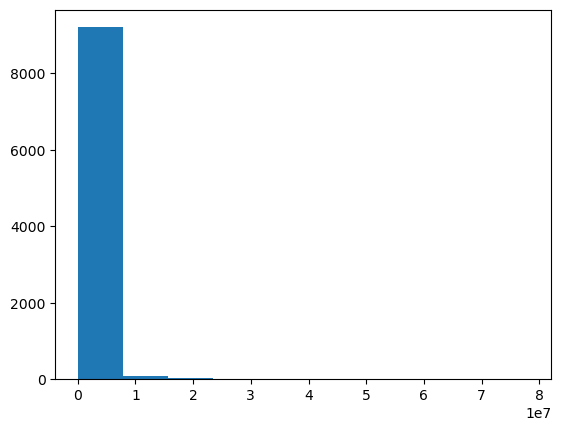

In [49]:
#Create a histogram of the Reviews
?plt.hist
plt.hist(inp2.Reviews)
plt.show()

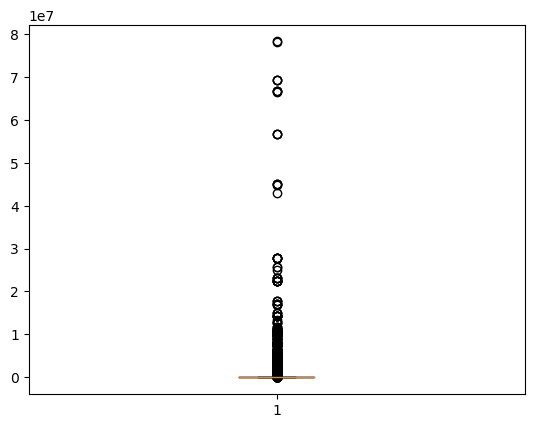

In [50]:
#Create a histogram of the Reviews
plt.boxplot(inp2.Reviews)
plt.show()

In [51]:
#Check records with 1 million reviews
inp2[inp2.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [53]:
#Drop the above records
inp2 = inp2[inp2.Reviews <= 10000000]
inp2.shape

(9246, 13)

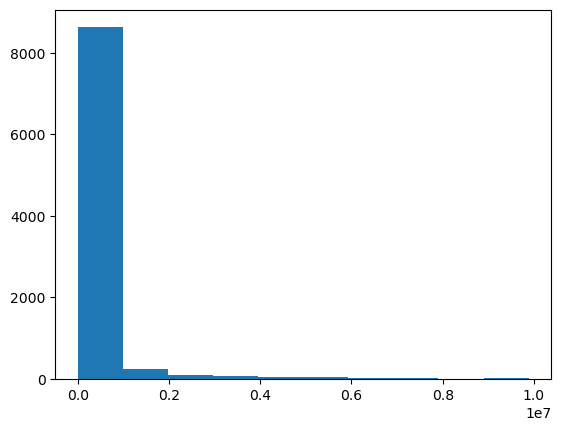

In [55]:
#Question - Create a histogram again and check the peaks
plt.hist(inp2.Reviews)
plt.show()

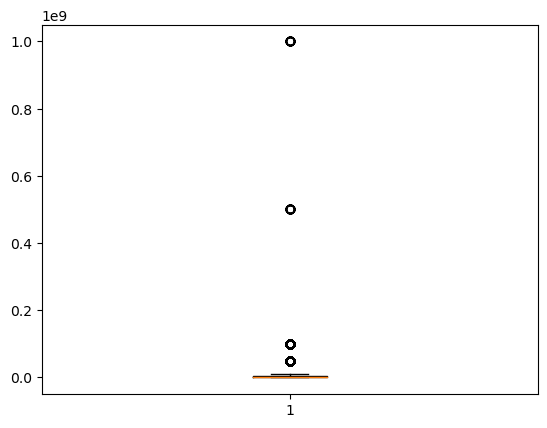

In [58]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp2.Installs)
plt.show()

In [59]:
inp2.Installs.describe()

count    9.246000e+03
mean     1.303561e+07
std      6.865554e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

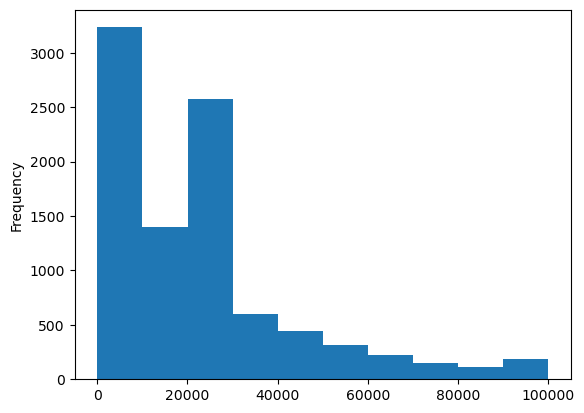

In [60]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp2.Size.plot.hist()
plt.show()

In [61]:
inp2.Size.describe()

count      9246.000000
mean      22525.267941
std       21125.902366
min           8.500000
25%        6500.000000
50%       20000.000000
75%       27000.000000
max      100000.000000
Name: Size, dtype: float64

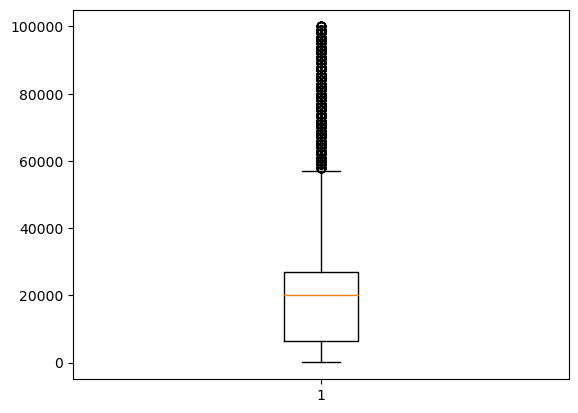

In [62]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp2.Size)
plt.show()

# Session 2 - Data Visualisation with Seaborn


eaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

Functionalities of Seaborn :

 - Dataset oriented API
 - Analysing univariate and bivariate distributions
 - Automatic estimation and plotting of linear regression models
 - Convenient views for complex datasets
 - Concise control over style
 - Colour palettes

In [64]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


# Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the KDE) that gets drawn over the distribution is the approximate probability density curve.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

Distplot

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

In [65]:
inp2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [66]:
?sns.distplot

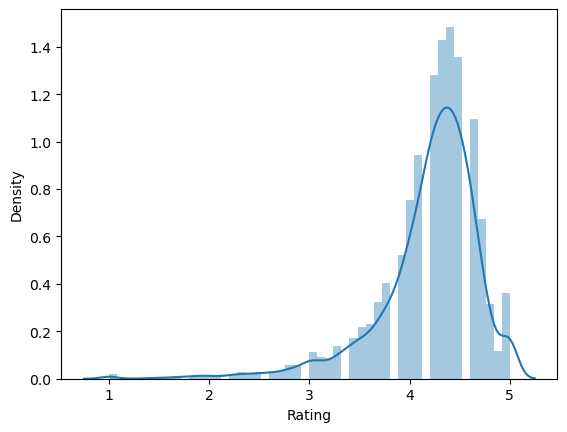

In [67]:
#Create a distribution plot for rating
sns.distplot(inp2.Rating)
plt.show()

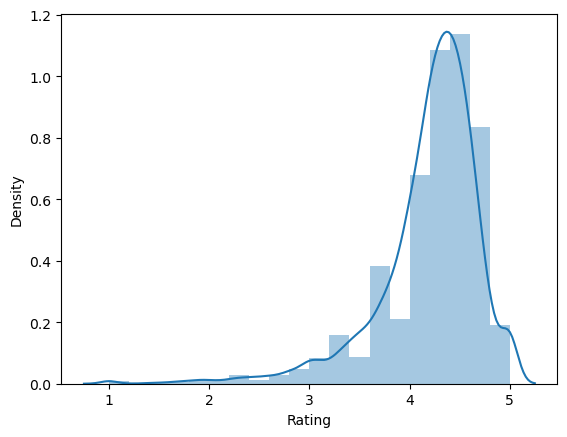

In [68]:
#Change the number of bins
sns.distplot(inp2.Rating,bins=20)
plt.show()

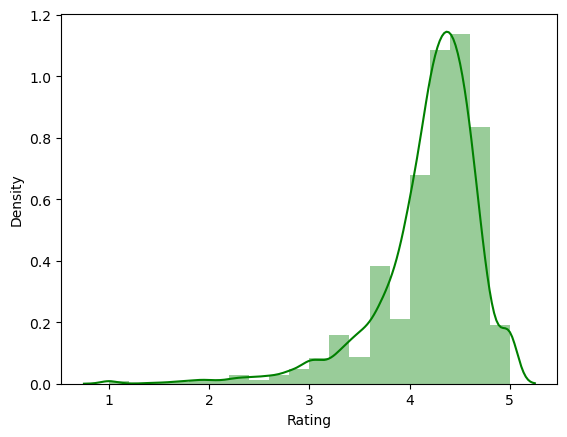

In [69]:
#Change the colour of bins to green
sns.distplot(inp2.Rating,bins=20,color ="g")
plt.show()

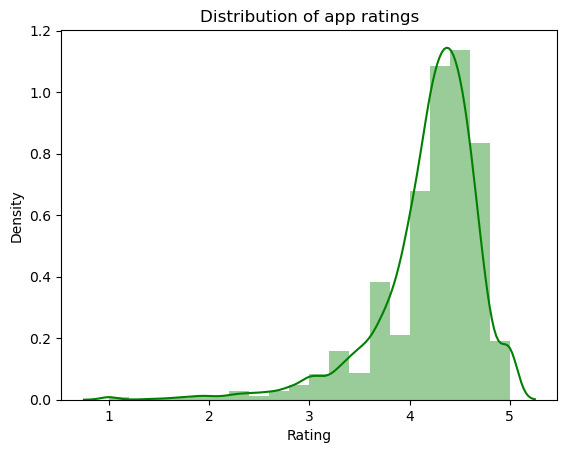

In [70]:
#Apply matplotlib functionalities
sns.distplot(inp2.Rating,bins=20,color="g")
plt.title("Distribution of app ratings",fontsize=12)
plt.show()

# Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

 - Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

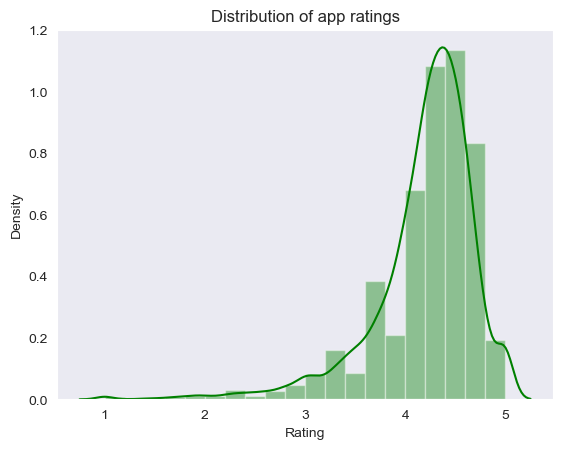

In [71]:
#Check all the styling options
#?sns.set_style
sns.set_style("dark")
sns.distplot(inp2.Rating,bins=20,color="g")
plt.title("Distribution of app ratings",fontsize=12)
plt.show()

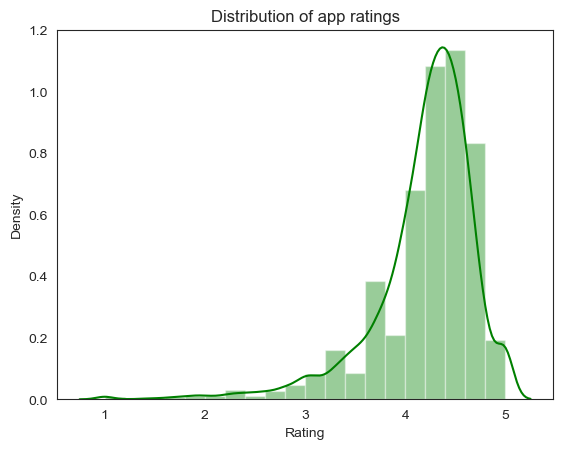

In [72]:
sns.set_style("white")
sns.distplot(inp2.Rating,bins=20,color="g")
plt.title("Distribution of app ratings",fontsize=12)
plt.show()

In [74]:
len(plt.style.available)

28

In [75]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [76]:
plt.style.use("tableau-colorblind10")

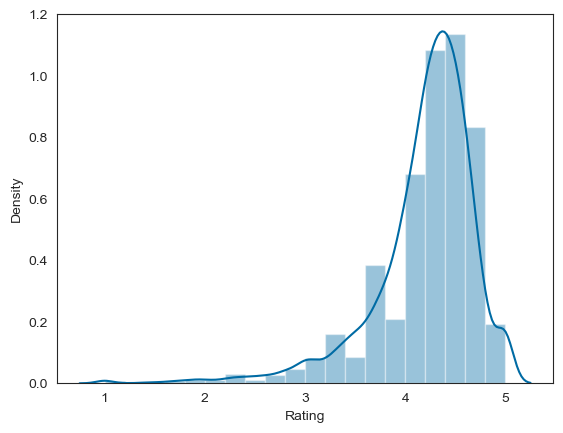

In [77]:
#Change the number of bins to 20
sns.distplot(inp2.Rating,bins=20)
plt.show()

In [78]:
plt.style.use("ggplot")

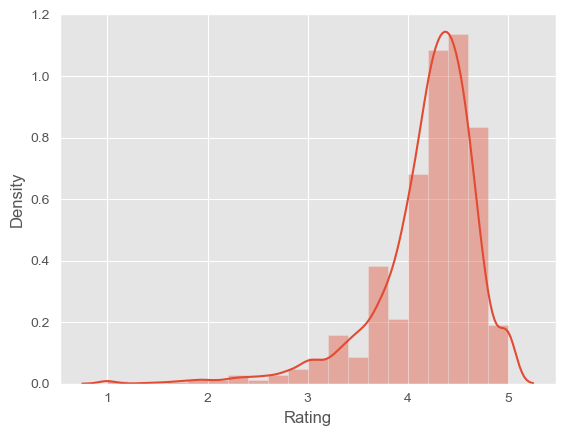

In [79]:
sns.distplot(inp2.Rating,bins=20)
plt.show()

In [80]:
plt.style.use("dark_background")

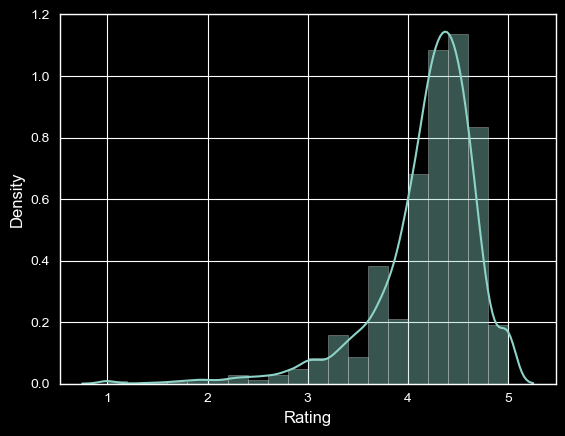

In [81]:
sns.distplot(inp2.Rating,bins=20)
plt.show()

In [82]:
plt.style.use("default")
%matplotlib inline

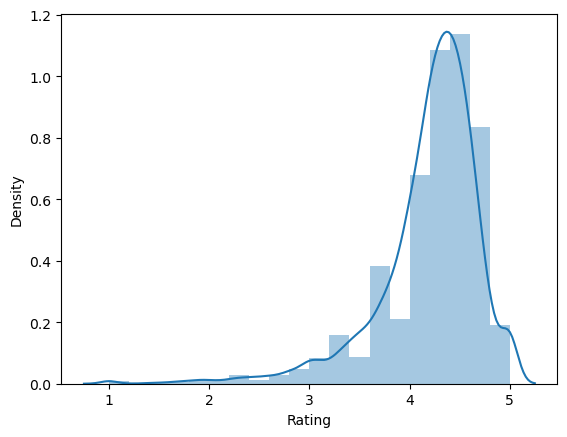

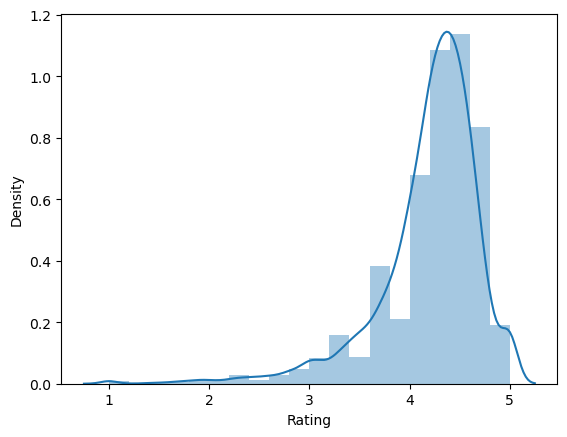

In [83]:
sns.distplot(inp2.Rating,bins=20)
plt.show(())

# Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

PieChart

barChart

 - You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [84]:
#Analyse the Content Rating column
inp2['Content Rating'].value_counts()

Content Rating
Everyone           7340
Teen               1067
Mature 17+          458
Everyone 10+        377
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [85]:
#Remove the rows with values which are less represented 
inp2 = inp2[~inp2['Content Rating'].isin(["Adults only 18+","Unrated"])]


In [86]:
inp2.shape

(9242, 13)

In [87]:
#Reset the index
inp2.reset_index(inplace=True,drop=True)

In [88]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9242 entries, 0 to 9241
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9242 non-null   object 
 1   Category        9242 non-null   object 
 2   Rating          9242 non-null   float64
 3   Reviews         9242 non-null   int32  
 4   Size            9242 non-null   float64
 5   Installs        9242 non-null   int64  
 6   Type            9242 non-null   object 
 7   Price           9242 non-null   float64
 8   Content Rating  9242 non-null   object 
 9   Genres          9242 non-null   object 
 10  Last Updated    9242 non-null   object 
 11  Current Ver     9242 non-null   object 
 12  Android Ver     9242 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 902.7+ KB


<Axes: ylabel='count'>

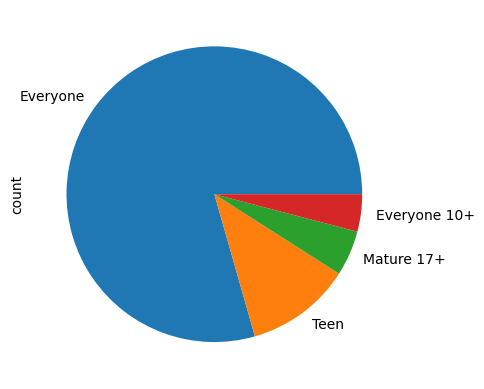

In [89]:
#Check the apps belonging to different categories of Content Rating 
inp2['Content Rating'].value_counts().plot.pie()


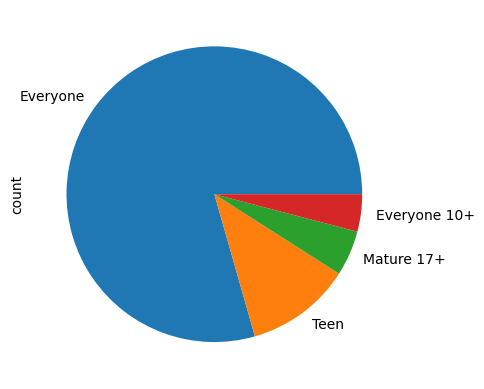

In [91]:
#Plot a pie chart
inp2['Content Rating'].value_counts().plot.pie()
plt.show()


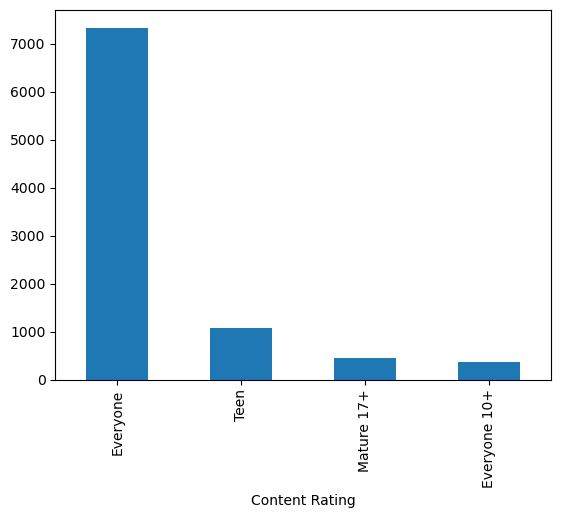

In [92]:
#Plot a bar chart
inp2['Content Rating'].value_counts().plot.bar()
plt.show()

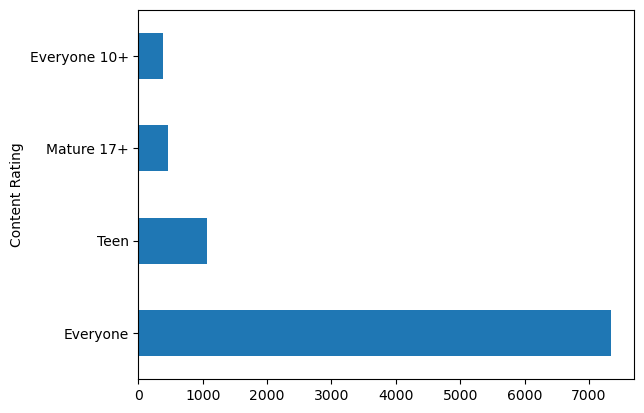

In [93]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp2['Content Rating'].value_counts().plot.barh()
plt.show()

# Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot.

Scatterplot

 - They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.
Scatterplot-Reg

 - Also, they help in observing naturally occuring clusters. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.
Scatter-Clusters

Note: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using sns.jointplot() for creating a scatter plot. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.jointplot.html

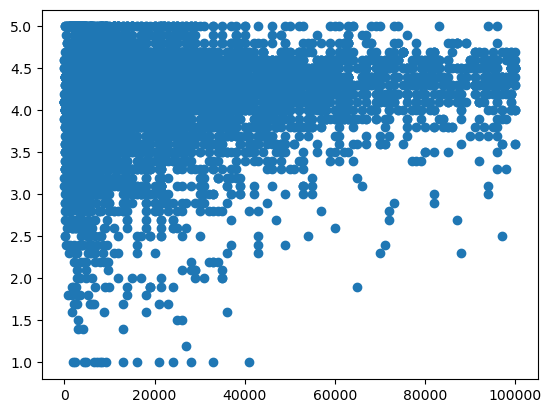

In [95]:
###Size vs Rating
##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp2.Size,inp2.Rating)
plt.show()

In [103]:
### Plot the same thing now using a jointplot
sns.set_style("white")


In [104]:
?sns.jointplot


In [106]:
sns.jointplot(inp2.Size, inp2.Rating)
plt.show()

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

In [107]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp2.Price, inp2.Rating)
plt.show()


TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

In [108]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price, inp1.Rating, kind="reg")
plt.show()


TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

# Reg Plots

 - These are an extension to the jointplots, where a regression line is added to the view

In [109]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp2.Price, inp2.Rating, kind="reg")
plt.show()


TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [110]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot("Price", "Rating", data=inp2[inp2.Price>0], kind="reg")
plt.show()


TypeError: jointplot() got multiple values for argument 'data'

# Pair Plots

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a scatter plot between 2 numeric variables
 - For the diagonal views, it plots a histogram

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

Pairplots

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using sns.pairplot() for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [111]:
## Create a pair plot for Reviews, Size, Price and Rating
?sns.pairplot


In [112]:
inp3 = inp2[['Reviews', 'Size', 'Price','Rating']]


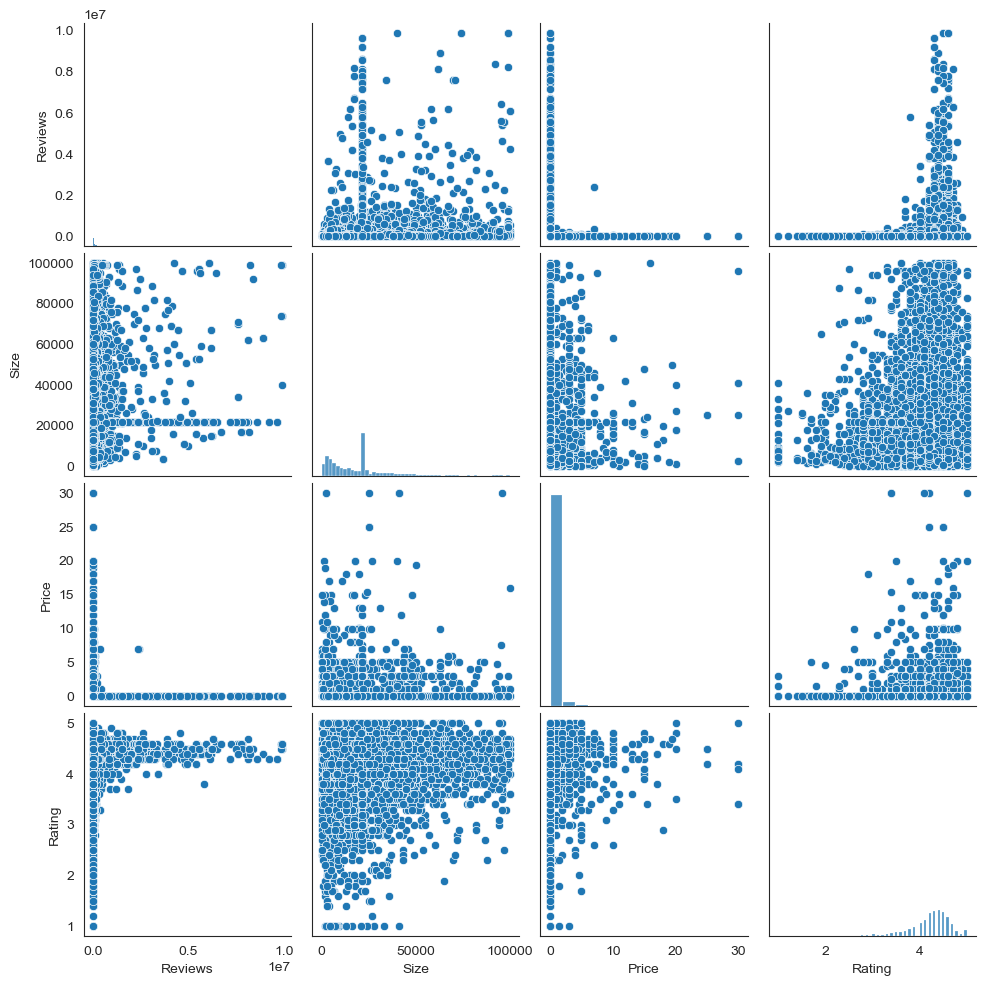

In [113]:
sns.pairplot(inp3)
plt.show()

# Bar Charts Revisited

 - Here, you'll be using bar charts once again, this time using the sns.barplot() function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
 - You can modify the estimator parameter to change the aggregation value of your barplot

<Axes: xlabel='Content Rating'>

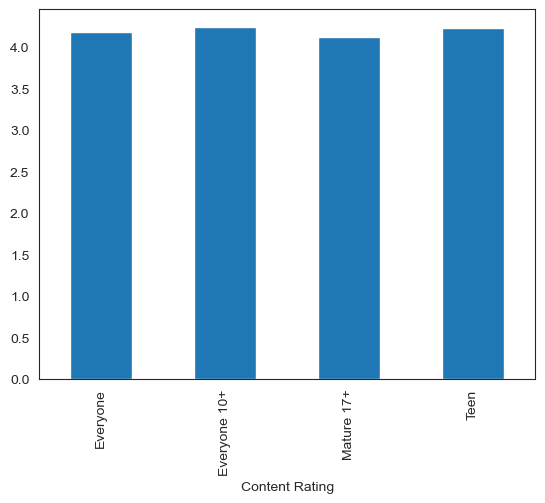

In [114]:
##Plot a bar plot of Content Rating vs Average Rating 
inp2.groupby(['Content Rating'])['Rating'].mean().plot.bar()


<Axes: xlabel='Content Rating'>

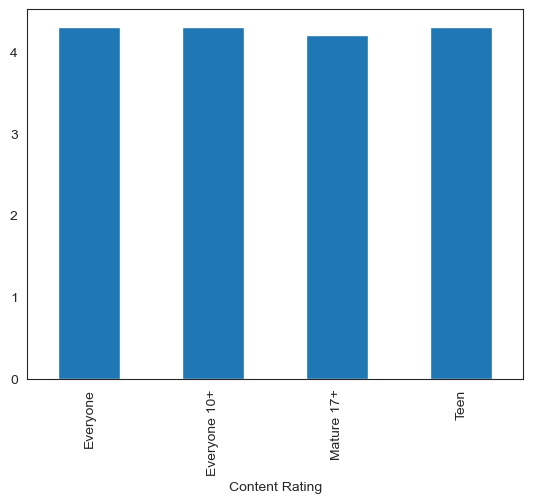

In [115]:
##Plot the bar plot again with Median Rating
inp2.groupby(['Content Rating'])['Rating'].median().plot.bar()


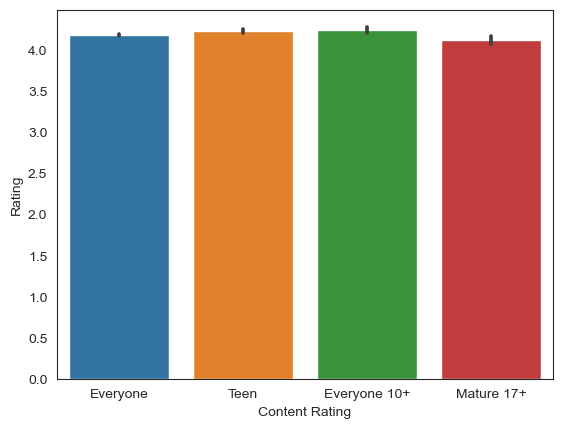

In [118]:
sns.barplot(data=inp2, x="Content Rating", y="Rating")

plt.show()

<Axes: xlabel='Content Rating', ylabel='Rating'>

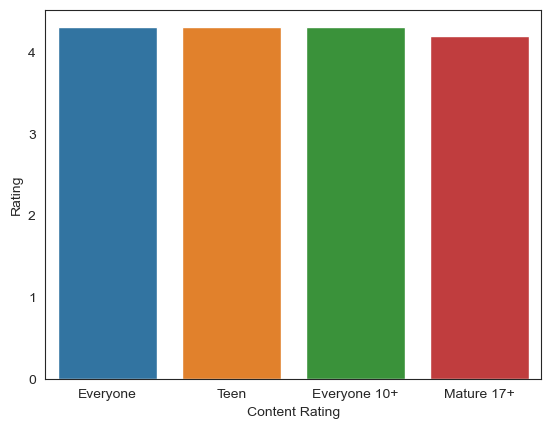

In [120]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp2, x="Content Rating", y="Rating", estimator=np.median)
sns.barplot(data=inp2, x="Content Rating", y="Rating", estimator=np.median)


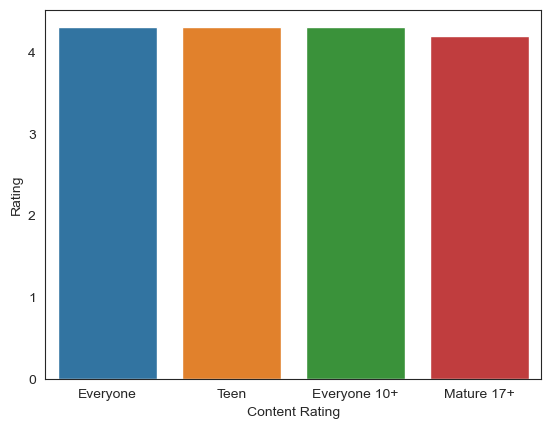

In [123]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp2, x="Content Rating", y="Rating", estimator=np.median)
plt.show()

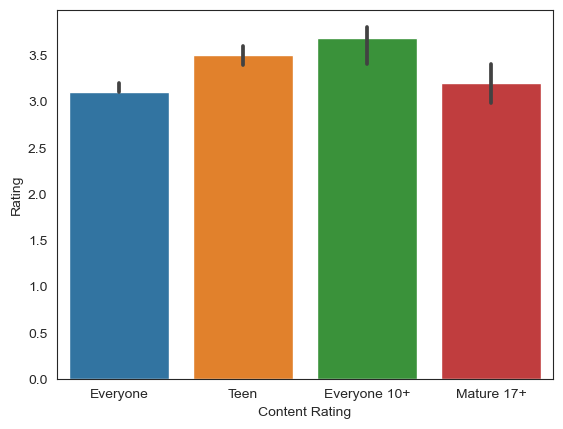

In [124]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp2, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))
plt.show()

In [125]:
inp2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9237,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9238,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9239,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9240,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


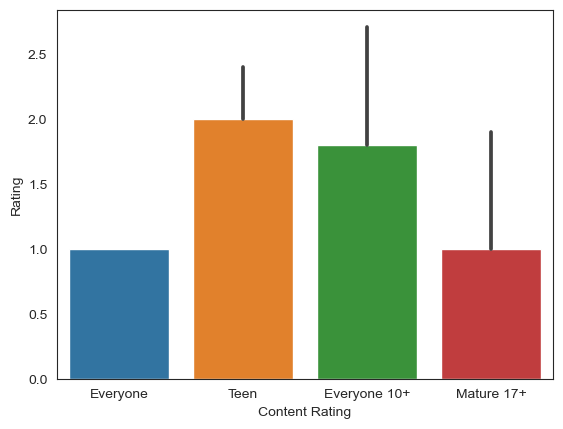

In [126]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp2, x="Content Rating", y="Rating", estimator=np.min)
plt.show()


# Box Plots Revisited

 - Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
 - Here you'll be using sns.boxplot() function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
##Plot a box plot of Rating vs Content Rating
